<a href="https://colab.research.google.com/github/LeandroCoelhos/exemplos_modelos/blob/main/PyCaret_Classifica%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PyCaret - Modelos de Classificação**

## **DADOS DE CUSTOS MÉDICOS**

In [1]:
pip install pycaret

In [2]:
from pycaret.datasets import get_data
dados = get_data('insurance') 

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
dados.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


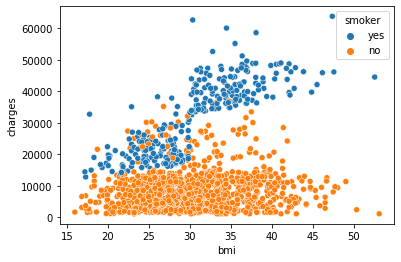

In [4]:
import seaborn as sns
sns.scatterplot(x = 'bmi', y = 'charges', hue = 'smoker', data = dados);

---

# **Objetivo: construir um modelo para detectar fumantes e possíveis fraudadores dessa variável.**

In [5]:
#from pycaret.classification import *
import pycaret.classification as pyclass 

In [6]:
class_setup = pyclass.setup(data = dados,
                    target = 'smoker',
                    normalize = True, 
                    ignore_low_variance = True,
                    remove_multicollinearity = True, 
                    multicollinearity_threshold = 0.95,
                    n_jobs = -1)

,Description,Value
0,session_id,8800
1,Target,smoker
2,Target Type,Binary
3,Label Encoded,"no: 0, yes: 1"
4,Original Data,"(1338, 7)"
5,Missing Values,False
6,Numeric Features,3
7,Categorical Features,3
8,Ordinal Features,False
9,High Cardinality Features,False


In [10]:
pyclass.models()#lista de modelos para classificação

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [11]:
todos = pyclass.compare_models(n_select = 5, turbo = False)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9616,0.9889,0.9282,0.8928,0.9090,0.8847,0.8859,0.134
lightgbm,Light Gradient Boosting Machine,0.9616,0.9926,0.9224,0.8985,0.9089,0.8846,0.8858,0.103
rbfsvm,SVM - Radial Kernel,0.9594,0.9829,1.0000,0.8407,0.9121,0.8861,0.8928,0.051
dt,Decision Tree Classifier,0.9573,0.9364,0.9011,0.8944,0.8961,0.8693,0.8705,0.016
ada,Ada Boost Classifier,0.9573,0.9867,0.9276,0.8765,0.8989,0.8719,0.8744,0.118
rf,Random Forest Classifier,0.9498,0.9889,0.8853,0.8794,0.8790,0.8475,0.8499,0.504
mlp,MLP Classifier,0.9487,0.9848,0.8858,0.8732,0.8770,0.8447,0.8466,1.684
lr,Logistic Regression,0.9466,0.9864,0.8853,0.8638,0.8716,0.8379,0.8403,0.025
svm,SVM - Linear Kernel,0.9434,0.0000,0.8708,0.8580,0.8617,0.8262,0.8283,0.017
et,Extra Trees Classifier,0.9263,0.9815,0.7871,0.8517,0.8154,0.7695,0.7724,0.464


In [12]:
modelo = pyclass.create_model('rbfsvm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9468,0.9712,1.0,0.7917,0.8837,0.8498,0.8596
1,0.9681,0.9867,1.0,0.8636,0.9268,0.9066,0.9105
2,0.9681,0.9832,1.0,0.8636,0.9268,0.9066,0.9105
3,0.9574,0.9831,1.0,0.8333,0.9091,0.8816,0.8879
4,0.9574,0.9743,1.0,0.8333,0.9091,0.8816,0.8879
5,0.9362,0.9878,1.0,0.7692,0.8696,0.8283,0.8408
6,0.9892,0.9900,1.0,0.9500,0.9744,0.9676,0.9681
7,0.9355,0.9751,1.0,0.7600,0.8636,0.8224,0.8357
8,0.9462,0.9851,1.0,0.7917,0.8837,0.8494,0.8592
9,0.9892,0.9929,1.0,0.9500,0.9744,0.9676,0.9681


In [13]:
modelo_tunado = pyclass.tune_model(modelo, optimize = 'Accuracy')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9362,0.9621,0.9474,0.7826,0.8571,0.8165,0.8227
1,0.9681,0.9818,1.0000,0.8636,0.9268,0.9066,0.9105
2,0.9468,0.9796,0.9474,0.8182,0.8780,0.8443,0.8480
3,0.9574,0.9757,1.0000,0.8333,0.9091,0.8816,0.8879
4,0.9574,0.9865,1.0000,0.8333,0.9091,0.8816,0.8879
5,0.9574,0.9912,1.0000,0.8333,0.9091,0.8816,0.8879
6,0.9892,0.9893,1.0000,0.9500,0.9744,0.9676,0.9681
7,0.9462,0.9716,1.0000,0.7917,0.8837,0.8494,0.8592
8,0.9462,0.9836,0.9474,0.8182,0.8780,0.8438,0.8475
9,0.9892,0.9886,1.0000,0.9500,0.9744,0.9676,0.9681


In [16]:
top4_tunados = [pyclass.tune_model(i) for i in todos[:4]]


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9149,0.8786,0.8421,0.7619,0.8000,0.7461,0.7476
1,0.9681,0.9979,0.8947,0.9444,0.9189,0.8991,0.8996
2,0.9362,0.8818,0.8421,0.8421,0.8421,0.8021,0.8021
3,0.9787,0.9990,0.9500,0.9500,0.9500,0.9365,0.9365
4,0.9574,0.9666,0.9500,0.8636,0.9048,0.8774,0.8791
5,0.9468,0.9845,0.8500,0.8947,0.8718,0.8383,0.8387
6,0.9570,0.9427,0.8421,0.9412,0.8889,0.8623,0.8644
7,0.9677,0.9623,0.9474,0.9000,0.9231,0.9027,0.9032
8,0.9570,0.9790,1.0000,0.8261,0.9048,0.8773,0.8840
9,0.9785,0.9228,0.8947,1.0000,0.9444,0.9312,0.9334


In [17]:
top4_tunados

[GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                            learning_rate=0.1, loss='deviance', max_depth=10,
                            max_features=1.0, max_leaf_nodes=None,
                            min_impurity_decrease=0.002, min_impurity_split=None,
                            min_samples_leaf=1, min_samples_split=7,
                            min_weight_fraction_leaf=0.0, n_estimators=160,
                            n_iter_no_change=None, presort='deprecated',
                            random_state=8800, subsample=0.4, tol=0.0001,
                            validation_fraction=0.1, verbose=0,
                            warm_start=False),
 LGBMClassifier(bagging_fraction=0.8, bagging_freq=0, boosting_type='gbdt',
                class_weight=None, colsample_bytree=1.0, feature_fraction=0.5,
                importance_type='split', learning_rate=0.1, max_depth=-1,
                min_child_samples=61, min_child_weight=0.001,

In [18]:
for i in range(len(top4_tunados)):
    ccc = pyclass.predict_model(top4_tunados[i]) 

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.9577,0.9793,0.9012,0.8902,0.8957,0.8692,0.8692


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9577,0.9917,0.9259,0.8721,0.8982,0.8715,0.8722


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Radial Kernel,0.9652,0.9828,1.0,0.8526,0.9205,0.8983,0.903


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.9602,0.949,0.8889,0.9114,0.9,0.8752,0.8753


In [19]:
combinacao_soft = pyclass.blend_models(top4_tunados, method = 'soft') # os sete melhores modelos soltam probabilidades, então posso fazer combinação 'soft'

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9362,0.9677,0.9474,0.7826,0.8571,0.8165,0.8227
1,0.9681,0.9909,0.9474,0.9000,0.9231,0.9030,0.9034
2,0.9468,0.9832,0.8947,0.8500,0.8718,0.8383,0.8387
3,0.9681,0.9939,1.0000,0.8696,0.9302,0.9097,0.9134
4,0.9681,0.9966,0.9500,0.9048,0.9268,0.9064,0.9069
5,0.9468,0.9932,0.8500,0.8947,0.8718,0.8383,0.8387
6,0.9677,0.9979,0.8947,0.9444,0.9189,0.8988,0.8993
7,0.9462,0.9915,0.9474,0.8182,0.8780,0.8438,0.8475
8,0.9677,0.9936,1.0000,0.8636,0.9268,0.9063,0.9103
9,0.9892,0.9993,0.9474,1.0000,0.9730,0.9663,0.9668


In [20]:
combinacao_hard = pyclass.blend_models(top4_tunados, method = 'hard')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9149,0.0,0.8421,0.7619,0.8000,0.7461,0.7476
1,0.9681,0.0,0.9474,0.9000,0.9231,0.9030,0.9034
2,0.9468,0.0,0.8947,0.8500,0.8718,0.8383,0.8387
3,0.9681,0.0,0.9500,0.9048,0.9268,0.9064,0.9069
4,0.9787,0.0,0.9500,0.9500,0.9500,0.9365,0.9365
5,0.9468,0.0,0.8500,0.8947,0.8718,0.8383,0.8387
6,0.9785,0.0,0.9474,0.9474,0.9474,0.9339,0.9339
7,0.9677,0.0,1.0000,0.8636,0.9268,0.9063,0.9103
8,0.9570,0.0,0.9474,0.8571,0.9000,0.8727,0.8745
9,0.9892,0.0,0.9474,1.0000,0.9730,0.9663,0.9668


Tanto as combinações 'hard' quanto 'soft' tiveram performances superiores a qualquer modelo individual. Por tanto, para modelo de produção, escolheremos a combinação 'soft', pois a 'hard' não solta probabilidades da variável resposta. 

In [21]:
preds = pyclass.predict_model(combinacao_soft, data = dados)

In [22]:
preds.sample(20).sort_values(by = 'Score')

,age,sex,bmi,children,smoker,region,charges,Label,Score
688,47,female,24.100,1,no,southwest,26236.57997,yes,0.5130
70,27,female,24.750,0,yes,southeast,16577.77950,yes,0.8861
327,45,male,36.480,2,yes,northwest,42760.50220,yes,0.9344
1226,38,male,16.815,2,no,northeast,6640.54485,no,0.9709
1111,38,male,38.390,3,yes,southeast,41949.24410,yes,0.9733
1207,36,male,33.400,2,yes,southwest,38415.47400,yes,0.9736
924,43,male,23.200,0,no,southwest,6250.43500,no,0.9896
575,58,female,27.170,0,no,northwest,12222.89830,no,0.9924
1002,24,male,25.800,0,no,southwest,1972.95000,no,0.9924
812,54,male,21.010,2,no,southeast,11013.71190,no,0.9925


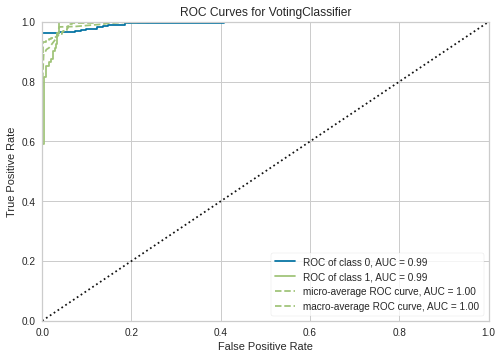

In [23]:
pyclass.plot_model(combinacao_soft)

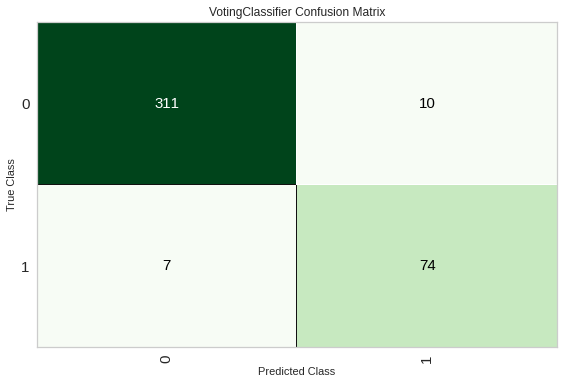

In [24]:
pyclass.plot_model(combinacao_soft, plot = 'confusion_matrix')

---

In [ ]:
pred = pyclass.predict_model(combinacao_soft)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.9701,0.9951,0.9770,0.8947,0.9341,0.9148,0.9163


## Utilizando a função predict_proba podemos tomar os valores das probabilidades dada pelo modelo. E podemos ver que o que acontece na variável 'Score' é que a probabilidade apresentada é sempre a de pertencer a resposta classificada, por isso então a suposta incoerência nos valores observados. 

---

## Utilizando o modelo selecionado na propria base para identificar possiveis fraudadores

In [25]:
pred = pyclass.predict_model(combinacao_soft, data = dados)
pred

,age,sex,bmi,children,smoker,region,charges,Label,Score
0,19,female,27.900,0,yes,southwest,16884.92400,yes,0.8694
1,18,male,33.770,1,no,southeast,1725.55230,no,0.9991
2,28,male,33.000,3,no,southeast,4449.46200,no,0.9991
3,33,male,22.705,0,no,northwest,21984.47061,no,0.5138
4,32,male,28.880,0,no,northwest,3866.85520,no,0.9970
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,no,0.9986
1334,18,female,31.920,0,no,northeast,2205.98080,no,0.9986
1335,18,female,36.850,0,no,southeast,1629.83350,no,0.9990
1336,21,female,25.800,0,no,southwest,2007.94500,no,0.9922


## Queremos selecionar aqueles em que a resposta observada é não fumante, mas que nosso modelo indica que é fumante. Vamos ordenar o resultado pelo Score, pois quanto mais alto, maior a probabilidade ser fumante e, portanto, maior o risco de ser um fraudador. 

In [26]:
possiveis_fraudes = pred[(pred['Label'] == 'yes') & (pred['smoker'] == 'no')].sort_values(by = 'Score', ascending = False)
possiveis_fraudes

,age,sex,bmi,children,smoker,region,charges,Label,Score
1104,37,male,29.800,0,no,southwest,20420.60465,yes,0.9076
62,64,male,24.700,1,no,northwest,30166.61817,yes,0.8585
1206,59,female,34.800,2,no,southwest,36910.60803,yes,0.8507
9,60,female,25.840,0,no,northwest,28923.13692,yes,0.8122
661,57,female,23.980,1,no,southeast,22192.43711,yes,0.8020
1003,48,male,29.600,0,no,southwest,21232.18226,yes,0.7659
1027,23,male,18.715,0,no,northwest,21595.38229,yes,0.7593
599,52,female,37.525,2,no,northwest,33471.97189,yes,0.7292
242,55,female,26.800,1,no,southwest,35160.13457,yes,0.6292
583,32,female,23.650,1,no,southeast,17626.23951,yes,0.6135


## Portanto, o conjunto de dados acima é uma lista dos possíveis fraudadores, ordenada por aqueles mais prováveis de serem de fato fraudadores. Uma instituição poderia, por exemplo, tem um patamar em que caso a probabilidade seja maior que esse patamar, então uma investigação seria realizada. Por exemplo, se esse patamar fosse 70%, os individuos a serem investigados então seriam os seguintes:

In [27]:
#estes são os resultados mais provaveis de fraudadores no meu conjunto de dados
investigar = possiveis_fraudes[possiveis_fraudes['Score'] > 0.7]
investigar

,age,sex,bmi,children,smoker,region,charges,Label,Score
1104,37,male,29.800,0,no,southwest,20420.60465,yes,0.9076
62,64,male,24.700,1,no,northwest,30166.61817,yes,0.8585
1206,59,female,34.800,2,no,southwest,36910.60803,yes,0.8507
9,60,female,25.840,0,no,northwest,28923.13692,yes,0.8122
661,57,female,23.980,1,no,southeast,22192.43711,yes,0.8020
1003,48,male,29.600,0,no,southwest,21232.18226,yes,0.7659
1027,23,male,18.715,0,no,northwest,21595.38229,yes,0.7593
599,52,female,37.525,2,no,northwest,33471.97189,yes,0.7292


In [28]:
modelo_final = pyclass.finalize_model(combinacao_soft)

In [29]:
#Salvando o modelo final treinado
pyclass.save_model(modelo_final, 'meu-modelo-para-smoker')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='smoker',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strat...
                                                                       class_weight=None,
                                                                       criterion='gini',
                                                                       max_depth=15,
          

In [30]:
# Deploy Básico. Colocando o modelo em produção

def DetectorDeFumante(age, sex, bmi, children, region, charges):
    dados0 = {'age': [age], 'sex': [sex], 'bmi': [bmi], 'children': [children], 'region': [region], 'charges': [charges]}
    dados = pd.DataFrame(dados0)

    modelo = pyclass.load_model('meu-modelo-para-smoker')
 
    pred = pyclass.predict_model(modelo, data = dados)
    resp = 'NÃO' if pred['Label'][0] == 'no' else 'SIM' 
    prob = pred['Score'][0] 


    print(' ')
    print('Idade: {}'.format(age))
    print('Sexo: {}'.format(sex))
    print('IMC: {}'.format(bmi))
    print('Crianças: {}'.format(children))
    print('Região: {}'.format(region))
    print('Custos: {}'.format(charges))
    print(' ')
    print('É fumante: {}, com probabilidade {:.2f}%'.format(resp, 100*prob)) 

In [32]:
import pandas as pd
DetectorDeFumante(age = 30, sex = 'male', bmi = 25, children = 0, region = 'southwest', charges = 2000)

Transformation Pipeline and Model Successfully Loaded
 
Idade: 30
Sexo: male
IMC: 25
Crianças: 0
Região: southwest
Custos: 2000
 
É fumante: NÃO, com probabilidade 99.62%


In [33]:
DetectorDeFumante(age = 30, 
                  sex = 'male', 
                  bmi = 25, 
                  children = 0, 
                  region = 'southwest', 
                  charges = 10000)

Transformation Pipeline and Model Successfully Loaded
 
Idade: 30
Sexo: male
IMC: 25
Crianças: 0
Região: southwest
Custos: 10000
 
É fumante: NÃO, com probabilidade 91.15%
